In [ ]:
# Test 3-1 Dataset C
# This test uses a simple CNN to classify between having an Square or a Circle

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
tf.config.list_physical_devices('GPU')

2024-03-18 20:18:13.757881: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 20:18:13.757967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 20:18:13.760260: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-18 20:18:13.771697: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 20:18:14.628028: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
train_dir = '../../Generator/Dataset_C/train'
test_dir = '../../Generator/Dataset_C/test'

In [3]:
IMG_SIZE = 500
BATCH_SIZE = 32
RANDOM_SEED = random.randint(0, 1000)
print(RANDOM_SEED)

47


In [4]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True
    )

Found 3000 files belonging to 2 classes.


2024-03-18 20:18:18.907818: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-18 20:18:18.908057: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-18 20:18:18.908178: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 2000 files belonging to 2 classes.


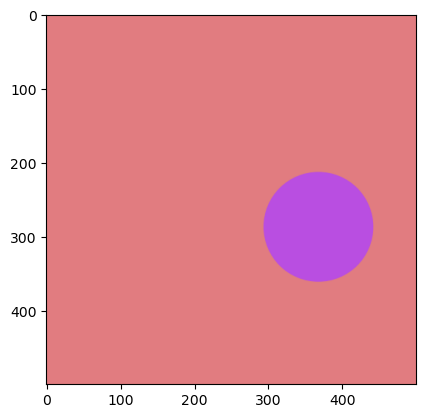

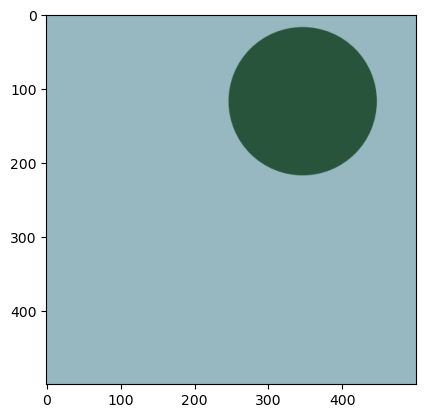

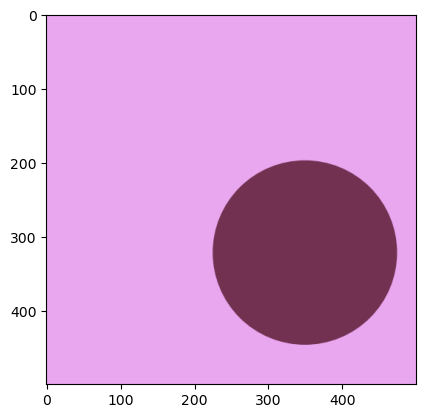

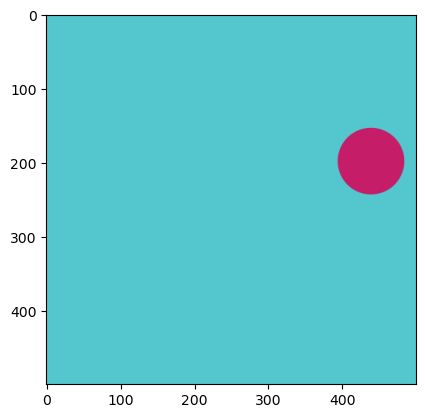

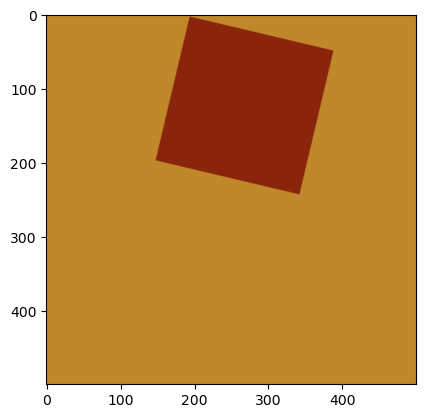

In [5]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [6]:
data_augmentation = keras.Sequential(
[
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

In [7]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [9]:
checkpoint_filepath = 'models/3-2/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)


In [10]:
#Best Epoch 18 = loss: 0.6531 - acc: 0.6160 - val_loss: 0.6973 - val_acc: 0.5375

history = model.fit(train_dataset, epochs=20, batch_size=16, validation_data=test_dataset, callbacks=[callbacks])

Epoch 1/20


2024-03-18 20:18:41.395939: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-03-18 20:18:41.503216: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-18 20:18:44.811861: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f7e748a79d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-18 20:18:44.811944: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-03-18 20:18:44.822466: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1710793124.863553   45798 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-03-18 20:18:48.134638: W extern

 1/94 [..............................] - ETA: 20:21 - loss: 0.6988 - acc: 0.3125

2024-03-18 20:18:53.210501: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.36GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


94/94 [==============================] - ETA: 0s - loss: 0.7000 - acc: 0.4907
Epoch 1: val_loss improved from inf to 0.69317, saving model to models/3-2/ch-001.ckpt
INFO:tensorflow:Assets written to: models/3-2/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/3-2/ch-001.ckpt/assets


94/94 [==============================] - 49s 383ms/step - loss: 0.7000 - acc: 0.4907 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/20
94/94 [==============================] - ETA: 0s - loss: 0.6935 - acc: 0.4883
Epoch 2: val_loss improved from 0.69317 to 0.69288, saving model to models/3-2/ch-002.ckpt
INFO:tensorflow:Assets written to: models/3-2/ch-002.ckpt/assets


INFO:tensorflow:Assets written to: models/3-2/ch-002.ckpt/assets


94/94 [==============================] - 27s 289ms/step - loss: 0.6935 - acc: 0.4883 - val_loss: 0.6929 - val_acc: 0.5110
Epoch 3/20
94/94 [==============================] - ETA: 0s - loss: 0.6937 - acc: 0.4960
Epoch 3: val_loss did not improve from 0.69288
94/94 [==============================] - 26s 270ms/step - loss: 0.6937 - acc: 0.4960 - val_loss: 0.6930 - val_acc: 0.5170
Epoch 4/20
94/94 [==============================] - ETA: 0s - loss: 0.6934 - acc: 0.5137
Epoch 4: val_loss did not improve from 0.69288
94/94 [==============================] - 26s 273ms/step - loss: 0.6934 - acc: 0.5137 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 5/20
94/94 [==============================] - ETA: 0s - loss: 0.6933 - acc: 0.4987
Epoch 5: val_loss did not improve from 0.69288
94/94 [==============================] - 26s 270ms/step - loss: 0.6933 - acc: 0.4987 - val_loss: 0.6932 - val_acc: 0.5020
Epoch 6/20
94/94 [==============================] - ETA: 0s - loss: 0.6929 - acc: 0.5087
Epoch 6: val_lo

INFO:tensorflow:Assets written to: models/3-2/ch-010.ckpt/assets


94/94 [==============================] - 27s 283ms/step - loss: 0.6901 - acc: 0.5250 - val_loss: 0.6928 - val_acc: 0.5165
Epoch 11/20
94/94 [==============================] - ETA: 0s - loss: 0.6890 - acc: 0.5297
Epoch 11: val_loss improved from 0.69283 to 0.69229, saving model to models/3-2/ch-011.ckpt
INFO:tensorflow:Assets written to: models/3-2/ch-011.ckpt/assets


INFO:tensorflow:Assets written to: models/3-2/ch-011.ckpt/assets


94/94 [==============================] - 26s 276ms/step - loss: 0.6890 - acc: 0.5297 - val_loss: 0.6923 - val_acc: 0.5110
Epoch 12/20
94/94 [==============================] - ETA: 0s - loss: 0.6871 - acc: 0.5420
Epoch 12: val_loss did not improve from 0.69229
94/94 [==============================] - 25s 259ms/step - loss: 0.6871 - acc: 0.5420 - val_loss: 0.6954 - val_acc: 0.5055
Epoch 13/20
94/94 [==============================] - ETA: 0s - loss: 0.6842 - acc: 0.5503
Epoch 13: val_loss improved from 0.69229 to 0.69170, saving model to models/3-2/ch-013.ckpt
INFO:tensorflow:Assets written to: models/3-2/ch-013.ckpt/assets


INFO:tensorflow:Assets written to: models/3-2/ch-013.ckpt/assets


94/94 [==============================] - 26s 275ms/step - loss: 0.6842 - acc: 0.5503 - val_loss: 0.6917 - val_acc: 0.5300
Epoch 14/20
94/94 [==============================] - ETA: 0s - loss: 0.6813 - acc: 0.5577
Epoch 14: val_loss did not improve from 0.69170
94/94 [==============================] - 25s 259ms/step - loss: 0.6813 - acc: 0.5577 - val_loss: 0.6918 - val_acc: 0.5300
Epoch 15/20
94/94 [==============================] - ETA: 0s - loss: 0.6784 - acc: 0.5577
Epoch 15: val_loss did not improve from 0.69170
94/94 [==============================] - 25s 267ms/step - loss: 0.6784 - acc: 0.5577 - val_loss: 0.6938 - val_acc: 0.5225
Epoch 16/20
94/94 [==============================] - ETA: 0s - loss: 0.6695 - acc: 0.5870
Epoch 16: val_loss did not improve from 0.69170
94/94 [==============================] - 26s 271ms/step - loss: 0.6695 - acc: 0.5870 - val_loss: 0.7211 - val_acc: 0.5030
Epoch 17/20
94/94 [==============================] - ETA: 0s - loss: 0.6641 - acc: 0.5943
Epoch 17

In [11]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=64)
print(val_loss, val_acc)

63/63 [==============================] - 6s 98ms/step - loss: 0.7337 - acc: 0.5225
0.7337380051612854 0.5224999785423279


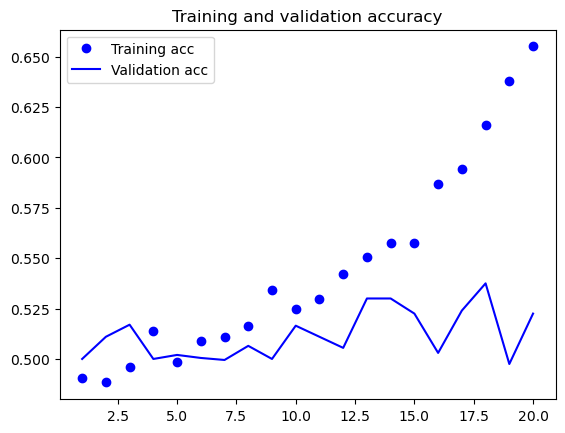

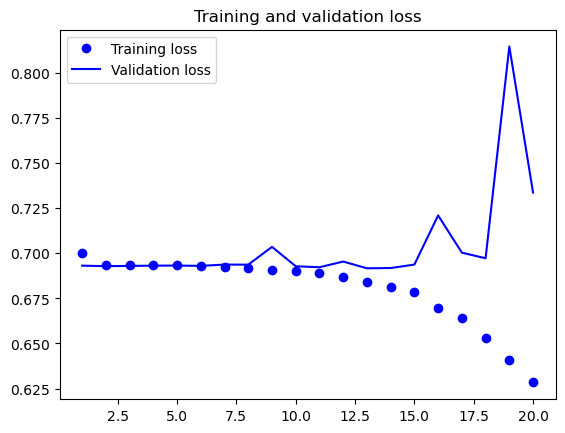

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/3-2/train_test_loss",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/3-2/train_test_acc",dpi=100)
plt.show()


In [ ]:
img = tf.keras.preprocessing.image.load_img('../../Generator/Dataset_B/test/square/square_309.png', target_size=(IMG_SIZE, IMG_SIZE))

In [ ]:
img = tf.keras.preprocessing.image.load_img('../../Generator/Dataset_B/test/none/none_1.png', target_size=(IMG_SIZE, IMG_SIZE))

In [ ]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())